#### Part 1: Prepare the Data

1.  Read  `myopia.csv`  into a Pandas DataFrame.
2.  Remove the "MYOPIC" column from the dataset.
3.  Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [15]:
# Initial Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [16]:
# Read myopia.csv into a Pandas DataFrame.
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [17]:
# Remove the "MYOPIC" column from the dataset.
myopia_df.drop(['MYOPIC'], axis=1, inplace=True)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [18]:
# Find null values
for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [19]:
# Find duplicate entries
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [20]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df[['AGE','SPHEQ','AL','ACD','LT','VCD','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']])

In [49]:
# Create and save Dataframe with the transformed data
new_myopia_df = pd.DataFrame(scaled_data, columns=myopia_df.columns)
new_file_path = Path("Resources/new_myopia.csv")
new_myopia_df.to_csv(new_file_path, index=False)

#### Part 2: Apply Dimensionality Reduction

1.  Perform dimensionality reduction with PCA. How did the number of the features change?
    
    **HINT**
    Rather than specify the number of principal components when you instantiate the PCA model, state the desired  **explained variance**. For example, say that a dataset has 100 features. Using  `PCA(n_components=0.99)`  creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3.
    
    For this assignment, preserve 90% of the explained variance in dimensionality reduction.
    
2.  Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
    
3.  Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [33]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=0.9)
myopia_pca = pca.fit_transform(scaled_data)
myopia_pca.shape

(618, 10)

In [34]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results
t_sne = TSNE(learning_rate=35)
t_sne_features = t_sne.fit_transform(myopia_pca)

/Users/keyurgajjar/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


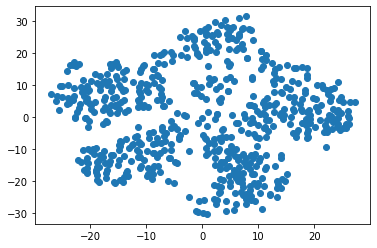

In [35]:
myopia_pca_df = pd.DataFrame()

myopia_pca_df['x'] = t_sne_features[:,0]
myopia_pca_df['y'] = t_sne_features[:,1]

import matplotlib.pyplot as plt

plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'])
plt.show()

*Are there distinct clusters?*

Yes, looks clearly even distribution of clusters as per the above visualization.

#### Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

-   Use a  `for`  loop to determine the inertia for each  `k`  between 1 through 10.
-   If possible, determine where the elbow of the plot is, and at which value of  `k`  it appears.

In [39]:
# Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,238220.734375
1,2,148185.718750
2,3,87611.890625
3,4,59802.750000
4,5,38509.214844


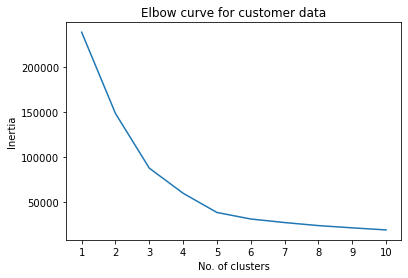

In [40]:
# Create an elbow plot to identify the best number of clusters.
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [41]:
# showing different clusters' visualizations to make a prediction
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['class'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [45]:
# show the clusters data set
clusters = get_clusters(3, myopia_pca_df)
clusters.head()

,x,y,class
0,12.541282,11.338575,0
1,-17.779537,10.924143,2
2,9.584383,-15.164956,1
3,-4.468960,-14.387748,1
4,10.896487,4.442813,0


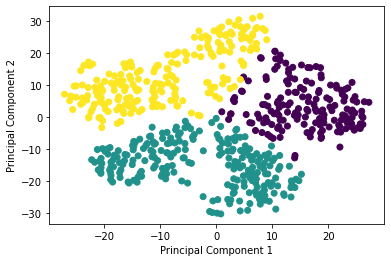

In [46]:
show_clusters(clusters)

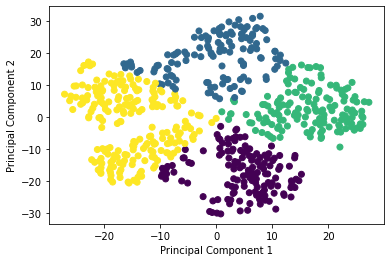

In [47]:
clusters = get_clusters(4, myopia_pca_df)
show_clusters(clusters)

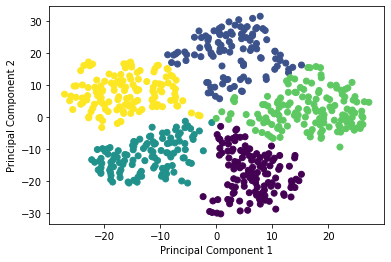

In [48]:
clusters = get_clusters(5, myopia_pca_df)
show_clusters(clusters)